In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")



In [6]:
# reflect an existing database into a new model
Base = automap_base()



# reflect the tables
Base.prepare(autoload_with = engine)


In [7]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
inspector = inspect(engine)

columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


[('2017-08-23',)]
2016-08-23 00:00:00


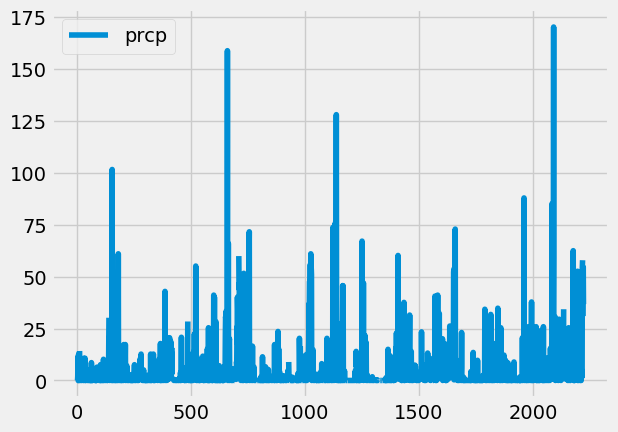

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

recent = session.query(func.max(measurement.date)).all()
print(recent)

# Calculate the date one year from the last date in data set.

date = dt.datetime(2017,8,23)
oneyearago = date - dt.timedelta(days=365)
print(oneyearago)

# Perform a query to retrieve the data and precipitation scores

prcplast12 = session.query(measurement.prcp, measurement.date).\
    filter(measurement.date > '2016-08-23').\
    order_by((measurement.date).desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcplast12_df = pd.DataFrame(prcplast12, columns = ["prcp", 'date'])

# Sort the dataframe by date
prcplast12_df.sort_values(by="date")


# Use Pandas Plotting with Matplotlib to plot the data

prcplast12_df.plot.line()


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcplast12_df.describe()

,prcp
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset

stationcount = session.query(func.count(station.station)).all()
print(stationcount)


[(9,)]


In [14]:
#inspect columns in available databases
olumns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_station=session.query(func.count(measurement.station), measurement.station, station.name).\
    join(station, station.station == measurement.station).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
active_station


[(2772, 'USC00519281', 'WAIHEE 837.5, HI US'),
 (2724, 'USC00519397', 'WAIKIKI 717.2, HI US'),
 (2709, 'USC00513117', 'KANEOHE 838.1, HI US'),
 (2669, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 (2612, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US'),
 (2202, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 (1979, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 (1372, 'USC00517948', 'PEARL CITY, HI US'),
 (511, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US')]

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

maxtemp=session.query(func.max(measurement.tobs)).\
    where(measurement.station == "USC00519281").\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
print("the max temperature at Waihee Station was",maxtemp,"degrees")

mintemp=session.query(func.min(measurement.tobs)).\
    where(measurement.station == "USC00519281").\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
print("the min temperature at Waihee Station was",mintemp,"degrees")

avgtemp=session.query(func.avg(measurement.tobs)).\
    where(measurement.station == "USC00519281").\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
print("the avg temperature at Waihee Station was",avgtemp,"degrees")

the max temperature at Waihee Station was [(29.4,)] degrees
the min temperature at Waihee Station was [(12.2,)] degrees
the avg temperature at Waihee Station was [(22.03582251082252,)] degrees


[('USC00519281', '2017-08-18')]


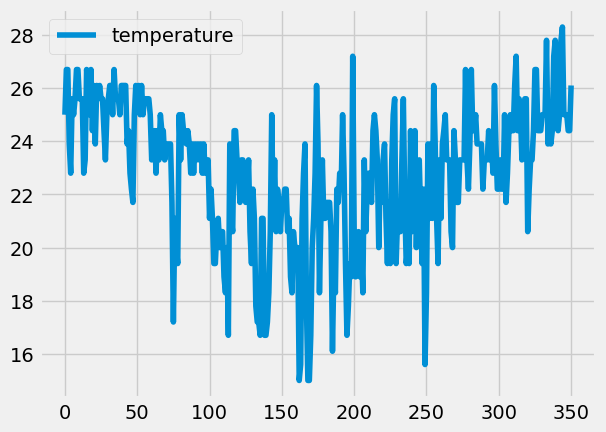

In [36]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

recent = session.query(measurement.station, func.max(measurement.date)).\
    where(measurement.station == "USC00519281").all()
print(recent)

templast12 = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date > '2016-08-23').\
    filter(measurement.station == 'USC00519281').\
    order_by((measurement.date).asc()).all()
templast12 

templast12months = pd.DataFrame(templast12, columns=["date",'temperature'])
templast12months
templast12months.plot()


# Close session

In [18]:
# Close Session
session.close()